#### Import packages ...

In [1]:
import sys
import matplotlib 
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.patches import FancyBboxPatch
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatches
import numpy as np
import networkx as nx
from scipy.special import hyp2f1, binom

sys.path.append('../utils/')
sys.path.append('../libs/')
from curvygraph import *
from utils import c8, boldfont, rcPhysRev, draw_process_motif
from inference_methods import cov_contribution, crosscov_contribution, lcf_factor_fast, lrc_factor_fast

#### Set fonts for figures ...

In [2]:
%%capture
# some matplotlib configs to make labels pretty
rcPhysRev(fontsize=10)

#### Define some functions for drawing figure elements ...

In [3]:
################################################################################
def make_contributions_plot(data, motifs=9, dx=-0.08, dy=0.08, small_font=10,
    titles=None, titlepads=[6,12,12,12], xlabels=None, edge_max=False, lw=1,
    edge_color='red', colors=None, palette=['darkblue','cyan', 'orange'], nds=1,
    plot_with_legend=0, data_labels=None, legend_kwargs={}, silver_frame=False):

    if titles is None:
        titles = ['ideal\nscore', 
                  r'${\bf \Sigma}_{ij}^{(0)}$', 
                  r'${\bf \Sigma}_{ij}^{(1)}$', 
                  r'${\bf S}_{ij}$']       
    if xlabels is None:
        xlabels = ['contribution']*4
    if colors is None:
        colors = ['darkblue']*4
        
    if isinstance(plot_with_legend, int):
        plot_with_legend = [plot_with_legend]
        
    if data_labels is None:
        data_labels = ['']*nds
        
    f, axes = plt.subplots(1, 5, 
        gridspec_kw={'width_ratios': [0.8,1,1,1,1]}, figsize=(4,0.8*motifs))
    axes[0].set_ylim([-0.5, motifs-0.5])
    #axes[0].set_xlim([-0.4+dx, 0.5+dx]) 

    for i in range(motifs):
        draw_process_motif(ax=axes[0], center=(0,motifs-i-1-dy), 
            edge_labels=edge_labels[i], 
            head_pad=0.025, node_radius=0.11, 
            node_label_fontsize=small_font-1, 
            edge_label_fontsize=small_font)

    # draw bars
    default_height = 0.6
    for j in range(2,6): 
        axes[j-1].set_title(titles[j-2], pad=titlepads[j-2])
        x = np.arange(motifs)
        if nds==1:
            axes[j-1].barh(x, data[j-2][:motifs][::-1],
                           height=default_height, #edgecolor='black', 
                           color=colors[j-2]) 
        else:
            for k in list(range(nds))[::-1]:
                axes[j-1].barh(x+k*default_height/nds, data[k][j-2][:motifs][::-1],
                               height=default_height/nds, #edgecolor='black', 
                               color=palette[k], label=data_labels[k])
            if j-2 in plot_with_legend:
                axes[j-1].legend(**legend_kwargs)
    if edge_max:
        for j in range(2,6): 
            if nds==1:
                data_max = np.max(data[j-2][:motifs][::-1])
                x_ = np.array([xi for xi in x if data[j-2][:motifs][::-1][xi]==data_max])
                data_ = np.array([np.max(data[j-2][:motifs][::-1])]*len(x_))
                if silver_frame and colors[j-2]=='#03045e':
                    ec = 'silver'
                else:
                    ec = edge_color
                axes[j-1].barh(x_, data_,
                               height=default_height, edgecolor=ec, lw=lw,
                               color=colors[j-2]) 
            else:
                for k in range(nds):
                    data_max = np.max(data[k][j-2][:motifs][::-1])
                    x_ = np.array([xi for xi in x if data[k][j-2][:motifs][::-1][xi]==data_max])
                    data_ = np.array([np.max(data[k][j-2][:motifs][::-1])]*len(x_))
                    if silver_frame and palette[k]=='#03045e':
                        ec = 'silver'
                    else:
                        ec = edge_color
                    axes[j-1].barh(x_+k*default_height/nds, data_,
                                   height=default_height/nds, edgecolor=ec, lw=lw,
                                   color=palette[k])

                
    # make axes pretty
    for i in range(1,5):
        axes[i].set_ylim([-0.5, motifs-0.5])
        axes[i].set_yticks(range(motifs))
        axes[i].set_yticklabels([])
        axes[i].set_xlabel(xlabels[i-1])

    plt.subplots_adjust(left=0, right=1, bottom=0.1, top=0.9)
    return f, axes

#### Draw Figures ...
(The following figures includes Figures 5, 6, and 8 in our paper.)

Draw figure with covariance contributions (Figure 5 in paper)

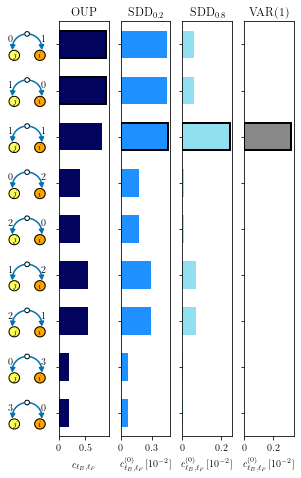

In [4]:
# set parameters
dts = [0.001, 0.2, 0.8, 1] 
epsilon = 0.9
theta = 1
edge_labels = [[0,1],[1,0],[1,1],[0,2],[2,0],[1,2],[2,1],[0,3],[3,0]]

# make data
data = np.zeros((4, len(edge_labels)))
for i, dt in enumerate(dts):
    data[i,:] = np.array([ cov_contribution(el[0]+el[1], el[1], epsilon=epsilon, 
        dtt=dt*theta, dt=dt) for el in edge_labels])
    if i > 0:
        data[i,:] = data[i,:]*100
#print(data)

# make figure
titles = ['OUP', 'SDD$_{0.2}$', 'SDD$_{0.8}$', 'VAR(1)']
titlepads = [6,6,6,6]
xlabels = [r'$c_{\ell_B,\ell_F}$',r'$c^{(0)}_{\ell_B,\ell_F} [10^{-2}]$',
           r'$c^{(0)}_{\ell_B,\ell_F} [10^{-2}]$',r'$c^{(0)}_{\ell_B,\ell_F} [10^{-2}]$']
fig, axes = make_contributions_plot(data, titles=titles, titlepads=titlepads, lw=2, 
    xlabels=xlabels, edge_max=True, colors=['#03045e', 'dodgerblue', '#90e0ef', '#888888'], edge_color='black')
plt.subplots_adjust(left=0, right=0.995, bottom=0.1, top=0.9, wspace=0.25)

# move xlabel for first plot
axes[1].set_xlabel(xlabels[0], labelpad=9)

# set x ticks
for i, xticks in enumerate([[0, 0.5] ,[0,0.3], [0,0.2], [0,0.2]]):
    axes[1+i].set_xticks(xticks)
    axes[1+i].set_xticklabels([str(x) for x in xticks])

# save figure
plt.savefig('../figures/figure_contributions_covariance.pdf')

Draw figure with lag-1 covariance contributions (not in paper)

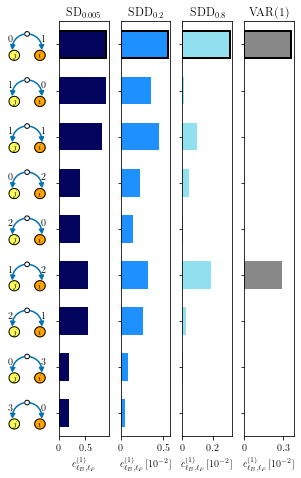

In [5]:
# set parameters
dts = [0.001, 0.2, 0.8, 1] 
epsilon = 0.9
theta = 1
edge_labels = [[0,1],[1,0],[1,1],[0,2],[2,0],[1,2],[2,1],[0,3],[3,0]]

# make data
data = np.zeros((4, len(edge_labels)))
for i, dt in enumerate(dts):
    data[i,:] = [ crosscov_contribution(el[0]+el[1],el[1], epsilon=epsilon, 
        dtt=dt*theta, dt=dt) for el in edge_labels]
    if i > 0:
        data[i,:] = data[i,:]*100    


# make figure
titles = [r'SD$_{0.005}$', r'SDD$_{0.2}$', r'SDD$_{0.8}$', 'VAR(1)']
titlepads = [6,6,6,6]
xlabels = [r'$c^{(1)}_{\ell_B,\ell_F}$',r'$c^{(1)}_{\ell_B,\ell_F} [10^{-2}]$',
           r'$c^{(1)}_{\ell_B,\ell_F} [10^{-2}]$',r'$c^{(1)}_{\ell_B,\ell_F} [10^{-2}]$']
fig, axes = make_contributions_plot(data, titles=titles, titlepads=titlepads, lw=2,
    xlabels=xlabels, edge_max=True, colors=['#03045e', 'dodgerblue', '#90e0ef', '#888888'], edge_color='black')
plt.subplots_adjust(left=0, right=0.995, bottom=0.1, top=0.9, wspace=0.25)

# set x ticks
for i, xticks in enumerate([[0, 0.5] ,[0,0.5], [0,0.2], [0,0.3]]):
    axes[1+i].set_xticks(xticks)
    axes[1+i].set_xticklabels([str(x) for x in xticks])

# save figure
plt.savefig('../figures/figure_contributions_crosscovariance.pdf')

Draw figure with lag-k covariance contributions (Figure 6 in paper)

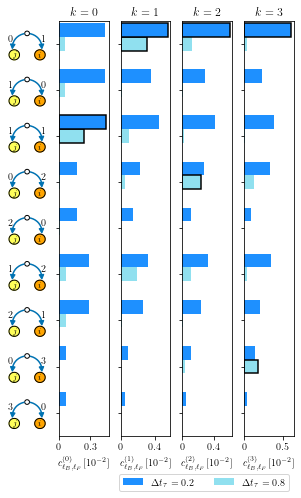

In [6]:
# set parameters
#dts = [0.001, 0.2, 0.8, 1] 
dt = 0.2
epsilon = 0.9
theta = 1
edge_labels = [[0,1],[1,0],[1,1],[0,2],[2,0],[1,2],[2,1],[0,3],[3,0]]

# make data
data = [np.zeros((4, len(edge_labels))),np.zeros((4, len(edge_labels)))]
for j, dt in enumerate([0.8, 0.2]):
    for i in range(4): #dt in enumerate(dts):
        data[j][i,:] = [ crosscov_contribution(el[0]+el[1], el[1], order=i, epsilon=epsilon, 
            dtt=dt*theta, dt=dt) for el in edge_labels]
        if i >= 0:
            data[j][i,:] = data[j][i,:]*100    

# make figure
titles = [r'$k=0$', r'$k=1$', r'$k=2$', r'$k=3$']
titlepads = [6,6,6,6]
xlabels = [r'$c^{(0)}_{\ell_B,\ell_F} [10^{-2}]$',r'$c^{(1)}_{\ell_B,\ell_F} [10^{-2}]$',
           r'$c^{(2)}_{\ell_B,\ell_F} [10^{-2}]$',r'$c^{(3)}_{\ell_B,\ell_F} [10^{-2}]$']
data_labels = [r'$\Delta t_\tau=0.8$', r'$\Delta t_\tau=0.2$']
fig, axes = make_contributions_plot(data, titles=titles, titlepads=titlepads, 
    xlabels=xlabels, nds=2, palette=['#90e0ef','dodgerblue'], edge_max=True, lw=1.5,
    edge_color='black', data_labels=data_labels, plot_with_legend=3,
    legend_kwargs={'ncol': 2, 'loc':1, 'bbox_to_anchor':(1., -0.08)})
plt.subplots_adjust(left=0, right=0.995, bottom=0.15, top=0.95, wspace=0.25)

# set x ticks
for i, xticks in enumerate([[0, 0.3] ,[0,0.4], [0,0.4], [0,0.5]]):
    axes[1+i].set_xticks(xticks)
    axes[1+i].set_xticklabels([str(x) for x in xticks])
    
# save figure
plt.savefig('../figures/figure_contributions_kcrosscovariance.pdf')

Draw PEM contributions (Figure 8 in paper)

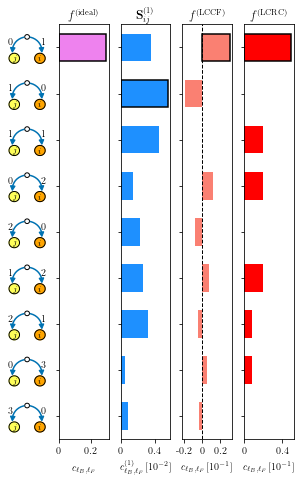

In [7]:
# set parameters
dt = 0.2 
epsilon = 0.9
theta = 1
edge_labels = [[0,1],[1,0],[1,1],[0,2],[2,0],[1,2],[2,1],[0,3],[3,0]]

# functions
def lrc_contribution(L, l, epsilon=0.9, dtt=0.5, sigma=1.0):
    c0 = cov_contribution(L, l, epsilon=epsilon, dtt=dt*theta, dt=dt, sigma=sigma)
    c1 = crosscov_contribution(L, l, epsilon=epsilon, dtt=dt*theta, dt=dt, sigma=sigma)
    c = c1 - lrc_factor_fast(theta*dt)*c0
    return c
    
def lcf_contribution(L, l, epsilon=0.9, dtt=0.5, sigma=1.0):
    c0 = cov_contribution(L, l, epsilon=epsilon, dtt=dt*theta, dt=dt, sigma=sigma)
    c1 = crosscov_contribution(L, l, epsilon=epsilon, dtt=dt*theta, dt=dt, sigma=sigma)
    c = c1 - lcf_factor_fast(theta*dt)*c0
    return c

# make data
data = np.zeros((4, len(edge_labels)))

# values for ideal score
data[0,:] = np.zeros(len(edge_labels))
data[0,0] = 0.3

# values for crosscov # should I remove this?
data[1,:] = np.array([ crosscov_contribution(el[0]+el[1], el[0], epsilon=epsilon, 
    dtt=dt*theta, dt=dt) for el in edge_labels])*100

# values for score 1
data[2,:] = np.array([ lcf_contribution(el[0]+el[1], el[1], epsilon=epsilon, 
    dtt=dt*theta) for el in edge_labels])*10

# values for score 2
data[3,:] = np.array([ lrc_contribution(el[0]+el[1], el[1], epsilon=epsilon, 
    dtt=dt*theta) for el in edge_labels])*10

# make figure
titles = [r'$f$\textsuperscript{(ideal)}', 
          r'${\bf S}^{(1)}_{ij}$', 
          r'$f$\textsuperscript{(LCCF)}', #r'$S^{(1,0)}_{ij}$', 
          r'$f$\textsuperscript{(LCRC)}'#, #r'$S^{(1,1)}_{ij}$'
         ]
titlepads = [6,6,6,6]
xlabels = [r'$c_{\ell_B,\ell_F}$',r'$c^{(1)}_{\ell_B,\ell_F} [10^{-2}]$',
           r'$c_{\ell_B,\ell_F} [10^{-1}]$',r'$c_{\ell_B,\ell_F} [10^{-1}]$']
#xlabels = None
fig, axes = make_contributions_plot(data, titles=titles, titlepads=titlepads, 
    xlabels=xlabels, colors=['violet', 'dodgerblue', 'salmon', 'red'],
    edge_max=True, edge_color='black', lw=1.5)
plt.subplots_adjust(left=0, right=0.995, bottom=0.1, top=0.9, wspace=0.25)

# move xlabels
axes[1].set_xlabel(xlabels[0], labelpad=9)
axes[3].set_xlabel(xlabels[2], labelpad=6)
axes[4].set_xlabel(xlabels[3], labelpad=6)

# set x ticks
for i, xticks in enumerate([[0, 0.2] ,[0,0.4], [-0.2,0,0.2], [0,0.4]]):
    axes[1+i].set_xticks(xticks)
    axes[1+i].set_xticklabels([str(x) for x in xticks])
    
# insert vertical line
axes[3].axvline(0, color='black', ls='--', lw=1)

# save figure
plt.savefig('../figures/figure_contributions_els.pdf')